<h1 align=center>Assignment 4</h1>

## Due Monday, November 2, by 11:59:59 p.m. 

Let _a,b,c,d_ be the last 4 non-zero digits of your Enumber. My Enumber is E00404624, then __a=4, b=6, c=2,__ and __d=4__. In all problems below, consider t to be in the interval [0, 1] :

Remember to start by importing the future!!

In [6]:
%pylab inline
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [7]:
a = 4; b = 6; c = 2; d = 4

__1.__ (10 points) Find the Lagrange polynomial interpolation of the points

$$(0, d), (3, 0), (6, 0), (8, a)$$

Expand into standard form ( $y = Ax^3 +Bx^2 +Cx+ D$ ). Show that it passes through each of the given points. What is its derivative? What is its second derivative?

In [8]:
import sympy 

def LagrangeInterpolator (xdata, ydata):
    X=sympy.symbols('X')
    assert len(xdata) == len(ydata)
    y=float(0.0)
    for k in range ( len(xdata) ):
        t=float(1.0)
        for j in range ( len(xdata) ):
            if j != k:
                t=t* ( (X-xdata[j]) / float(xdata[k]-xdata[j]) ) # when I put number, OK
        y+= t*ydata[k]
    return y

xdata = [0,3,6,8]
ydata = [d,0,0,a]
print sympy.simplify(LagrangeInterpolator(xdata,ydata))

0.0222222222222222*X**3 + 0.0222222222222222*X**2 - 1.6*X + 4.0


In [9]:
from scipy import interpolate
x = [0,3,6,8]; w = [d,0,0,a]
interpolate.lagrange(x,w) #which are exactly the same as above

poly1d([ 0.02222222,  0.02222222, -1.6       ,  4.        ])

In [10]:
def Lagrange(x, xdata, ydata ):
    " LagrangeInterpolator(x,data)  -> x value predicted from polynomial interpolation of data"
    
    n = len(xdata)
    assert len(xdata) == len(ydata), "xdata and ydata must be the same length"
    if( iterable(x) ):
        y = zeros(len(x))
        phi = ones((n,len(x)))
    else:
        y = 0
        phi = ones(n)
    for i in range(n):
        phi[i] = prod( [ (x-xdata[j])/(xdata[i]-xdata[j]) for j in range(n) if j!= i ], axis=0 ) 
        y += ydata[i]*phi[i]
    return y

/Users/dennis/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


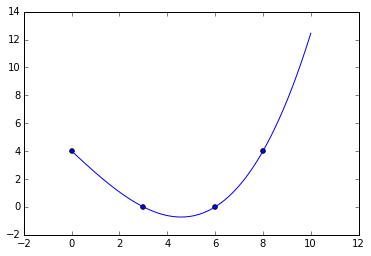

In [11]:
xdata = [0,3,6,8]
ydata = [d,0,0,a]

x = linspace(0,10,1000)

scatter(xdata,ydata)
plot(x,Lagrange(x,xdata,ydata))

In [12]:
y= sympy.simplify(LagrangeInterpolator(xdata,ydata))
print "the first derivative of function is ", sympy.diff(y)

print "the second derivative of function is ", sympy.diff(sympy.diff(y))

the first derivative of function is  0.0666666666666667*X**2 + 0.0444444444444444*X - 1.6
the second derivative of function is  0.133333333333333*X + 0.0444444444444444


__2.__ (5 points) Find the Barycentric form of Lagrange polynomial interpolation of the points

$$(0, d), (3, 0), (6, 0), (8, a)$$

Show that it produces the same curve as in 1

In [13]:
def BarycentricInterpolator(xdata, ydata ):
    X=sympy.symbols('X')
    assert len(xdata) == len(ydata)
    y=float(0.0)
    n = len(xdata)
    w = ones(n)
    for i in range(n):
        w[i] = 1/prod([xdata[i] - xdata[j] for j in range(n) if j != i ]) 
    xMinusxi = X - array(xdata)
    phi = prod(xMinusxi)
    for i in range ( n ):
        y += w[i]/(xMinusxi[i]) *ydata[i]
    return phi*y

xdata = [0,3,6,8]
ydata = [6,0,0,a]
print sympy.sympify(BarycentricInterpolator(xdata,ydata))

X*(X - 8)*(X - 6)*(X - 3)*(0.05/(X - 8) - 0.0416666666666667/X)


/Users/dennis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/dennis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


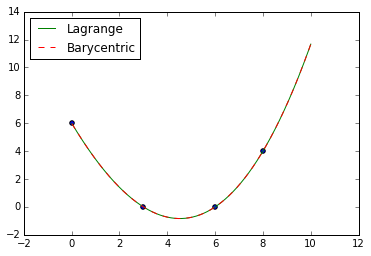

In [14]:
def f(X):
    return X*(X - 8)*(X - 6)*(X - 3)*(0.05/(X - 8) - 0.0416666666666667/X)

import matplotlib.pyplot as plt
xdomain = linspace(0,10,1000)
scatter(xdata,ydata)
# red dashes, blue squares and green triangles
#plt.plot(xdomain, Lagrange(xdomain,xdata,ydata), 'b--', xdomain, f(xdomain), 'r--')
line1 = plt.plot(xdomain, Lagrange(xdomain,xdata,ydata), 'g', label='Lagrange')
line2 = plt.plot(xdomain, f(xdomain), '--r', label='Barycentric')
pylab.legend(loc='upper left')
plt.show()

__3.__ (5 points) Find the Bezier curve of order 3 given by

$$r_1(t) = (1-t)^3P_0 +  3(1-t)^2tP_1 + 3(1-t)t^2P_2+t^3P_3$$

through the points $P_0 = (0, d) \ and \ P_3 = (3, 0)$ with control points $P_1 = (1, a) \ and \ P_2 = (2, b)$ Given that $r_1(t) = <x(t), y (t)>$ solve for y as a function of x to obtain y = P (x): 
1. What is the slope of the tangent line at $P_0$? 
2. What is the slope of the tangent line at $P_3$? 
3. What is the slope of the tangent line corresponding to x = 1.5?

$((1-t)+t)^3 = 1 \rightarrow (1-t)^3 +  3(1-t)^2t + 3(1-t)t^2+t^3 =1$

whose terms be redefined as 
$$
\begin{align}
B_0(t) &+ B_1(t) + B_2(t) + B_3(t) = 1 \\
B_0(t) &= (1-t)^3 \\
B_1(t) &= 3(1-t)^2t \\
B_2(t) &= 3(1-t)t^2 \\
B_3(t) &= t^3
\end{align}
$$
For any given t, the four basis functions will exactly sum to give the x value for that t 
1. $x(t) = x_0B_0(t) + x_1B_1(t) + x_2B_2(t) + x_3B_3(t)$ 
2. $y(t) = y_0B_0(t) + y_1B_1(t) + y_2B_2(t) + y_3B_3(t)$

And therefore we have

$x(t) = 0(1-t)^3 + 3(1-t)^2t + 6(1-t)t^2+ 3t^3 = 3t$
$y(t) = 4(1-t)^3 + 12(1-t)^2t + 6(1-t)t^2+ 3t^3 = 3t$

In [15]:
from math import factorial

def binomialCoefficient(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

def Beizer_x(xdata):
    t=sympy.symbols('t')
    n = len(xdata) #order of x
    out = float(0.0)
    for j in range ( n ):
        out += binomialCoefficient(n-1,j)*(1-t)**(n-1-j) * t**j * xdata[j]
    return out

def Beizer_y(ydata):
    t=sympy.symbols('t')
    n = len(ydata) #order of x
    out = float(0.0)
    for j in range ( n ):
        out += binomialCoefficient(n-1,j)*(1-t)**(n-1-j) * t**j * ydata[j]
    return out

xdata = [0,1,2,3]
ydata = [d,a,b,0]
xt = sympy.simplify(Beizer_x(xdata)) 
yt = sympy.simplify(Beizer_y(ydata)) 
print "x(t) function is", xt 
print "y(t) function is", yt

x(t) function is 3*t
y(t) function is -10*t**3 + 6*t**2 + 4


In [16]:
#sympy.div(Beizer_y(ydata),Beizer_x(xdata))
x=sympy.symbols('x')
Beizer_1 = yt.subs('t',x/3) #x = 3t
print "the Beizer function is", Beizer_1
dif_Beizer = sympy.diff(Beizer_1,x)
print "the first derivative of Beizer function is", dif_Beizer
print "slope at P0 [0,4] is ", dif_Beizer.subs('x',0)
print "slope at P3 [3,0] is ", dif_Beizer.subs('x',3)
print "slope at Point where x = 1.5 is ", dif_Beizer.subs('x',1.5)

the Beizer function is -10*x**3/27 + 2*x**2/3 + 4
the first derivative of Beizer function is -10*x**2/9 + 4*x/3
slope at P0 [0,4] is  0
slope at P3 [3,0] is  -6
slope at Point where x = 1.5 is  -0.500000000000000


In [17]:

# def make_bezier(xypair):
#     n = len(xypair)
#     combination = pascal_row(n-1)
#     def bezier(ts):
#         result = []
#         for t in ts:
#             tpowers = (t**i in range(n)) #t^n
#             upowers = reversed([(1-t)**i for i in range(n)]) #(1-t)^n
#             coef = [c*a*b for c,a,b in zip(combination,tpowers,upowers)]
#             result.append(tuple(sum([coef*p for coef, p in zip(coefs, ps)])
#                                for ps in zip(*xypair))) #Sigma(coef*p)
#             return result
#         return bezier
# def pascal_row(n):
#     result = [1]
#     x, numerator = 1, n
#     for denominator in range(1, n//2+1): #n/2
#         print(numerator,denominator,x)
#         x *= numerator
#         x /= denominator
#         result.append(x)
#         numerator -= 1
#     if n&1 == 0: # n is even
#         result.extend(reversed(result[:-1])) #[1,2,3]-->[1, 2, 3, 2, 1]
#     else:
#         result.extend(reversed(result)) #[1,2] --> [1,2,2,1]
#     return result 

__4.__ (5 points) Find the Bezier curve of order 3 given by

$$r_2(t) = (1-t)^3Q_0 +  3(1-t)^2tQ_1 + 3(1-t)t^2Q_2+t^3Q_3$$

through the points $Q_0 = (3,0) \ and \ Q_3 = (6,0)$ with control points $Q_1 = (4, b) \ and \ Q_2 = (5, c)$ Given that $r_2(t) = <x(t), y (t)>$ solve for y as a function of x to obtain y = Q (x): 
1. What is the slope of the tangent line at $Q_0$? 
2. What is the slope of the tangent line at $Q_3$? 
3. Show that the second derivative is linear

In [18]:
xdata = [3,4,5,6]
ydata = [0,b,c,0]
xt = sympy.simplify(Beizer_x(xdata)) 
yt = sympy.simplify(Beizer_y(ydata)) 
print "x(t) function is", xt 
print "y(t) function is", yt

x(t) function is 3*t + 3
y(t) function is 6*t*(2*t**2 - 5*t + 3)


In [19]:
#sympy.div(Beizer_y(ydata),Beizer_x(xdata)) 
Beizer_2 = yt.subs('t',x/3-1) #x = 3t+3
print "the Beizer function is", sympy.expand(Beizer_2)
dif_Beizer = sympy.diff(Beizer_2,x)
print "the first derivative of Beizer function is", sympy.expand(dif_Beizer)
print "slope at Q0 [3,0] is ", dif_Beizer.subs('x',3)
print "slope at Q3 [6,0] is ", dif_Beizer.subs('x',6)
print "the second derivative of Beizer function is", sympy.diff(dif_Beizer), "which is linear on x"

the Beizer function is 4*x**3/9 - 22*x**2/3 + 38*x - 60
the first derivative of Beizer function is 4*x**2/3 - 44*x/3 + 38
slope at Q0 [3,0] is  6
slope at Q3 [6,0] is  -2
the second derivative of Beizer function is 8*x/3 - 44/3 which is linear on x


__5.__ (5 points) Find the Bezier curve of order 2 given by

$$r_3(t) = (1-t)^2R_0 +  2(1-t)tR_1 + t^2R_2$$

through the points $R_0 = (6,0) \ and \ R_2 = (8,a)$ with control points $R_1 = (7, d)$ Given that $r_3(t) = <x(t), y (t)>$ solve for y as a function of x to obtain y = R(x): 
1. What is the slope of the tangent line at $R_0$? 
2. What is the slope of the tangent line at $R_2$? 
3. Calculate the second derivative and explain why the concavity cannot change (inflect) between x = 6 and x = 8

In [20]:
xdata = [6,7,8]
ydata = [0,d,a]
xt = sympy.simplify(Beizer_x(xdata)) 
yt = sympy.simplify(Beizer_y(ydata)) 
print "x(t) function is", xt 
print "y(t) function is", yt

x(t) function is 2*t + 6
y(t) function is 4*t*(-t + 2)


In [21]:
sympy.div(Beizer_y(ydata),Beizer_x(xdata))
Beizer_3 = yt.subs('t',x/2-3) #x = 2t+6
print "the Beizer function is", sympy.expand(Beizer_3)
dif_Beizer = sympy.diff(Beizer_3,x)
print "the first derivative of Beizer function is", sympy.expand(dif_Beizer)
print "slope at R0 [6,0] is ", dif_Beizer.subs('x',6)
print "slope at R2 [8,4] is ", dif_Beizer.subs('x',8)
print "the second derivative of Beizer function is", sympy.diff(dif_Beizer), "which is constant over x"


the Beizer function is -x**2 + 16*x - 60
the first derivative of Beizer function is -2*x + 16
slope at R0 [6,0] is  4
slope at R2 [8,4] is  0
the second derivative of Beizer function is -2 which is constant over x


__Concavity Theorem__: If the function f is twice differentiable at x=c, then the graph of f is: 
1. concave upward at $(c, f(c))$ if $f^{''}(c)<0$
2. concave downward at $(c, f(c))$ if $f^{''}(c)>0$

Since second order derivative remains to be positive over all x, it's concave downward in between x= 6 and x =8

Therefore, no change of concavity happened. 

__6.__ (5 points) In 3, 4, and 5, solve for t as a function of x resulting in t = P (x), t = Q (x), and t = R (x) in each of 3,4,5, respectively.

Define the function
$$
f(x) = \left\{\begin{matrix}
P(x) & over & 0\leq x < 3\\ 
Q(x) & over & 3\leq x < 6\\ 
R(x) & over & 6\leq x \leq 8
\end{matrix}\right.
$$

1. Over what range of x-values is f (x) continuous? 
2. Over what range of x-values is f (x) differentiable (i.e., smooth) ? Explain fully. 
3. In what sense would you consider f (x) to be an example of a B-spline?

In [22]:
def r_1(x):
    return -10*x**3/27 + 2*x**2/3 + 4
def r_2(x):
    return 6*(x/3 - 1)*(-5*x/3 + 2*(x/3 - 1)**2 + 8)
def r_3(x):
    return 4*(-x/2 + 5)*(x/2 - 3)
# def f(x):
#     conds = [(x>=0) and (x<3), (x>=3) and (x<6), (x>=6) and (x<=8)]
#     funcs = [lambda x: -10*x**3/27 + 2*x**2/3 + 4, 
#              lambda x: 6*(x/3 - 1)*(-5*x/3 + 2*(x/3 - 1)**2 + 8), 
#              lambda x: 4*(-x/2 + 5)*(x/2 - 3)]
#     return numpy.piecewise(x, conds, funcs)

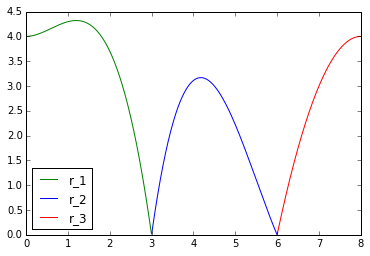

In [23]:
xdomain = linspace(0,10,1000)
x1 = xdomain[np.all([xdomain >=0, xdomain < 3], axis=0)] 
line1 = plt.plot(x1, r_1(x1), 'g', label='r_1')
x2 = xdomain[np.all([xdomain >=3, xdomain <6], axis=0)] 
line2 = plt.plot(x2, r_2(x2), 'b', label='r_2')
x3 = xdomain[np.all([xdomain >=6, xdomain <8], axis=0)] 
line3 = plt.plot(x3, r_3(x3), 'r', label='r_3')
pylab.legend(loc='lower left')
plt.show()

f(x) is continuous over 0 and 8 but not differentiable at x = 3 and x =6 (differentiable elsewhere).

$f^{'}(3^-) = -6 \ and \ f^{'}(3^+) = 6$, left and right derivatives are not equal $\Rightarrow$ f(x) is not differentiable at x = 3

$f^{'}(6^-) = -2 \ and \ f^{'}(6^+) = 4$, left and right derivatives are not equal $\Rightarrow$ f(x) is not differentiable at x = 6

Bezier Curve: 
1. There is __no local control__ (change of one control point affects the whole curve)
2. Degree of curve is fixed by the number of control points

B-Splines
1. Each control point is associated with a __unique basis function__
2. Each point affects the shape of the curve over a range of parameter values where the basis
function is non-zero
3. A k degree B-spline curve definted by n+1 control points will consist n-k+1 Bezier curves
4. internal knots are distinct its derivatives are continuous up to the derivative of degree n-1

Therefore, since f(x) is not continuous to the derivative of degree 2, we can say f(x) is quadratic spline (B-spline, n=2).

__7.__ (10 points ) In 1978, Dr. Edwin Catmull of the New York Institute
of Technology along with Jim Clark generalized B-spline surfaces into
the concept of subdivision surfaces. The next year, Catmull was hired
by CGL (the computer graphics lab), where he began developing the
RenderMan software tool, leading eventually to the formation of Pixar
Studios and the "Pixar Braintrust" headed by Catmull. Pixa's mathematical
(computer science) algorithms and research group have wonmany awards (including an Academy Award in 2005 for the algorithm
itself). Catmull remains the president of Pixar and is also a frequent
speaker at mathematical conferences on the mathematics of subdivision
surfaces.

Subdivision surfaces are generalizations of the subdivision curves. Below
is the Chaikinís algorithm for a simple subdivision curve.

    Each iteration begins with a piecewise linear curve:
        1) Insert new vertices at the midpoints of the line segments
        2) Average successive vertices (clockwise if closed curve)
        
Notice that each "average" in step 2 involves an old vertex and a new
vertex. In the limit (which occurs quickly even Pixar only uses 2
or 3 iterations most of the time, with no more than 5 that I know of),
the set of points is a smooth curve "controlled" by the original cage.
Your job is to iterate it 3 times beginning with the "cage"

$$(0, d), (3, 0), (6, 0), (8, a)$$

which is the piecewise linear function denoted by the 4 points (note:
these become the control points of the curve). You then should produce
a graph (plot) of the resulting subdivision points along with its original
control "cage" Note: If you desire, you can add as many points as you
want to the original cage.

In [213]:
xdata = [0,3,6,8]
ydata = [d,0,0,a]


In [214]:
def subdivision(xdata,ydata):
    n = len(xdata)
    temp_x = [(xdata[i]+xdata[i+1])/2 for i in range(n-1)]
    temp_y = [(ydata[j]+ydata[j+1])/2 for j in range(n-1)]
    for i in range(n-1):
        xdata.insert(2*i+1, temp_x[i]) 
        ydata.insert(2*i+1, temp_y[i]) 
    m = len(xdata)
    xnew = [(xdata[i]+xdata[i+1])/2 for i in range(m-1)]
    ynew = [(ydata[i]+ydata[i+1])/2 for i in range(m-1)]
    return xnew, ynew

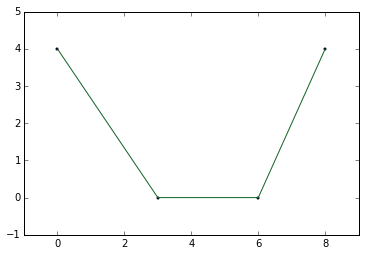

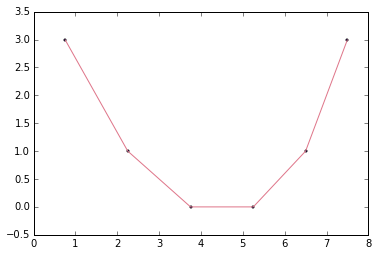

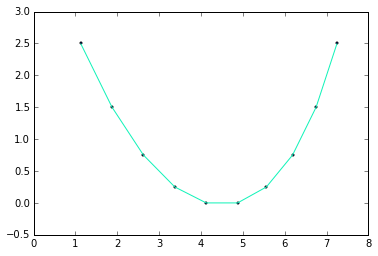

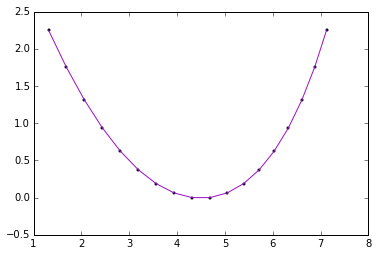

In [215]:
import random
from matplotlib.patches import Polygon


for i in range(4):
    points=zip(xdata,ydata)
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    plt.scatter(xdata,ydata,s=5)
    pylab.gca().add_patch(patches.Polygon(points,closed=False,fill=False,edgecolor= color))
    pylab.show()
    xdata, ydata = subdivision(xdata,ydata)



__8.__ ( 5 points ) Repeat exercise 7 using the following algorithm.

    Each iteration begins with a piecewise linear curve:
        
   1. Insert new vertices at the midpoints of the line segments.
   2. For successive pairs of vertices (clockwise if closed curve)Add $\frac{1}{4}$ times the first to $\frac{3}{4}$ times the second

In [220]:
xdata = [0,3,6,8]
ydata = [d,0,0,a]

In [221]:
def subdivision2(xdata,ydata):
    n = len(xdata)
    temp_x = [(xdata[i]+xdata[i+1])/2 for i in range(n-1)]
    temp_y = [(ydata[j]+ydata[j+1])/2 for j in range(n-1)]
    for i in range(n-1):
        xdata.insert(2*i+1, temp_x[i]) 
        ydata.insert(2*i+1, temp_y[i]) 
    m = len(xdata)
    Qx = [(3/4*xdata[i]+1/4*xdata[i+1])for i in range(m-1)]
    Rx = [(1/4*xdata[i]+3/4*xdata[i+1])for i in range(m-1)]
    Qy = [(3/4*ydata[i]+1/4*ydata[i+1])for i in range(m-1)]
    Ry = [(1/4*ydata[i]+3/4*ydata[i+1])for i in range(m-1)]
    xnew = [j for i in zip(Qx,Rx) for j in i]
    ynew = [j for i in zip(Qy,Ry) for j in i]
    return xnew,ynew

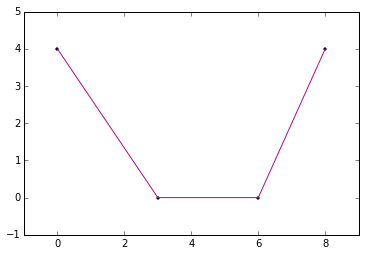

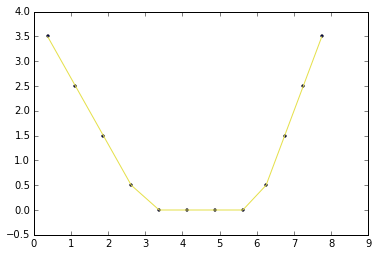

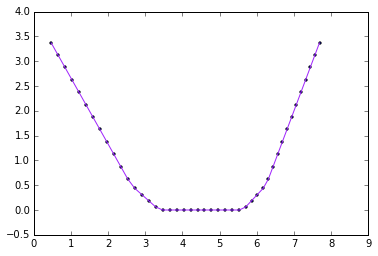

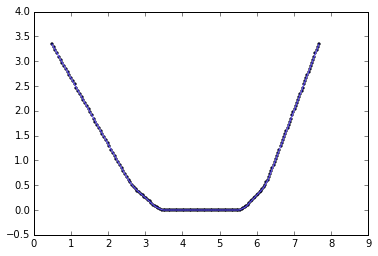

In [222]:

for i in range(4):
    points=zip(xdata,ydata)
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    plt.scatter(xdata,ydata,s=5)
    pylab.gca().add_patch(patches.Polygon(points,closed=False,fill=False,edgecolor= color))
    pylab.show()
    xdata, ydata = subdivision2(xdata,ydata)

